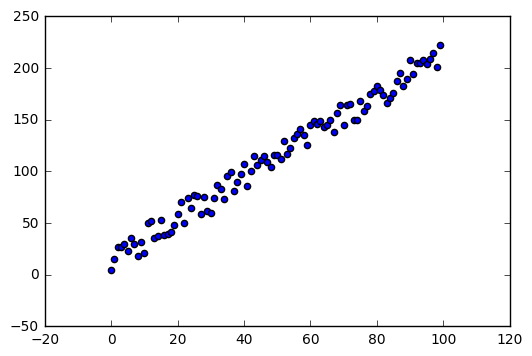

,x,y
0,0.0,4.370078
1,1.0,15.647810
2,2.0,27.123514
3,3.0,27.165397
4,4.0,29.958769


In [82]:
import numpy as np  
import matplotlib.pyplot as plt 
import pandas as pd
import visuals as vs
import random

random.seed(100)
def createDataset(a, b, jump):    
    x = np.array([])
    y = np.array([])
    while a < b:
        x = np.append(x, a)
        y = np.append(y, 2*a + 1*random.uniform(0, 30))
        a += jump   
    dfx = pd.DataFrame({'x': x})
    dfy = pd.DataFrame({'y': y})
    return dfx.join(dfy)
    
df = createDataset(0, 100, 1)  
plt.scatter(df['x'], df['y'])  
plt.show() 

x = df[["x"]]
y = df[["y"]]
#print features
#features.head(5)
df.head(5)

In [85]:
from sklearn.cross_validation import train_test_split
# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, values, test_size=0.2, random_state=546544)
print "Training and testing split was successful."

Training and testing split was successful.


### Learning curves

In [57]:
#vs.ModelLearning(features, values)

### Complexity Curves 

In [58]:
#vs.ModelComplexity(X_train, y_train)

### Fitting the model

In [86]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(n_splits=10, test_size=0.1, train_size=0.1, random_state=None)

    # TODO: Create a decision tree regressor object
    regressor = LinearRegression()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'normalize': [True, False]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc =  make_scorer(performance_metric)
    

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator = regressor, param_grid= params, scoring = scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [88]:

# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Optimal parameters.".format(reg.get_params())

Optimal parameters.


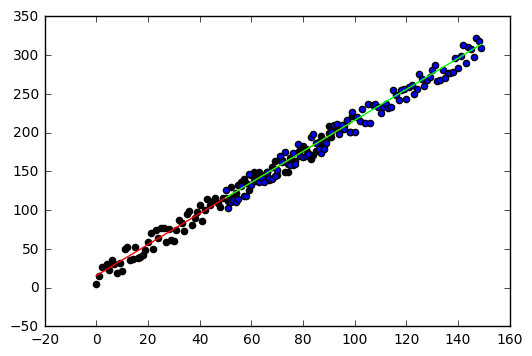

R2 Score 0.980453855826 


In [89]:
# Produce a matrix for client data
from sklearn.metrics import r2_score

def createDatasetPredinction(a, b, jump, rg):    
    y = np.array([])
    while a < b:
        y = np.append(y, rg.predict(a))
        a += jump   
    return pd.DataFrame(y, columns = ['y'])


df2 = createDataset(50, 150, 1)  
dfPredictions = createDatasetPredinction(0, 100, 1, reg)  
dfPredictions2 = createDatasetPredinction(50, 150, 1, reg)  
    
fig, ax = plt.subplots()
ax.scatter(df['x'], df['y'], color='000000') 
ax.scatter(df2['x'], df2['y'])  

ax.plot(df['x'],dfPredictions['y'], color='#FF0000')
ax.plot(df2['x'], dfPredictions2['y'], color='#00FF00')
plt.show() 


print "R2 Score {} ".format(r2_score(y, dfPredictions))